In [74]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [75]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [76]:
%%time
data_root = os.path.join("/", "Users", "ravinderboparai", "Documents", "DSA", "UC_Caseload_Model")
uc_path =os.path.join(data_root, "uc_int_eco_timeseries.csv") 

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 20 µs


In [86]:
uc_data = pd.read_csv(uc_path, header=None)
uc_data1 = uc_data.set_axis(['date', 'customers', 'unemployment','CPI','FTSE 100','GBP/USD'], axis=1, inplace=True)   

In [87]:
uc_data

,date,customers,unemployment,CPI,FTSE 100,GBP/USD
0,2009-02-01,1421543,7.1,3.2,3830.09,1.4477
1,2009-03-01,1421543,7.3,2.9,3926.14,1.4290
2,2009-04-01,1421543,7.6,2.3,4243.71,1.4329
3,2009-05-01,1443002,7.8,2.2,4417.94,1.4781
4,2009-06-01,1443002,7.9,1.8,4249.21,1.6178
...,...,...,...,...,...,...
142,2020-12-01,2553201,5.1,0.6,6460.52,1.3325
143,2021-01-01,2512381,5.0,0.7,6407.46,1.3672
144,2021-02-01,2603555,4.9,0.4,6483.43,1.3713
145,2021-03-01,2619909,4.8,0.7,6713.63,1.3939


In [88]:
uc_data.shape

(147, 6)

0 date
1 customers
2 unemployment
3 CPI
4 FTSE 100
5 GBP/USD


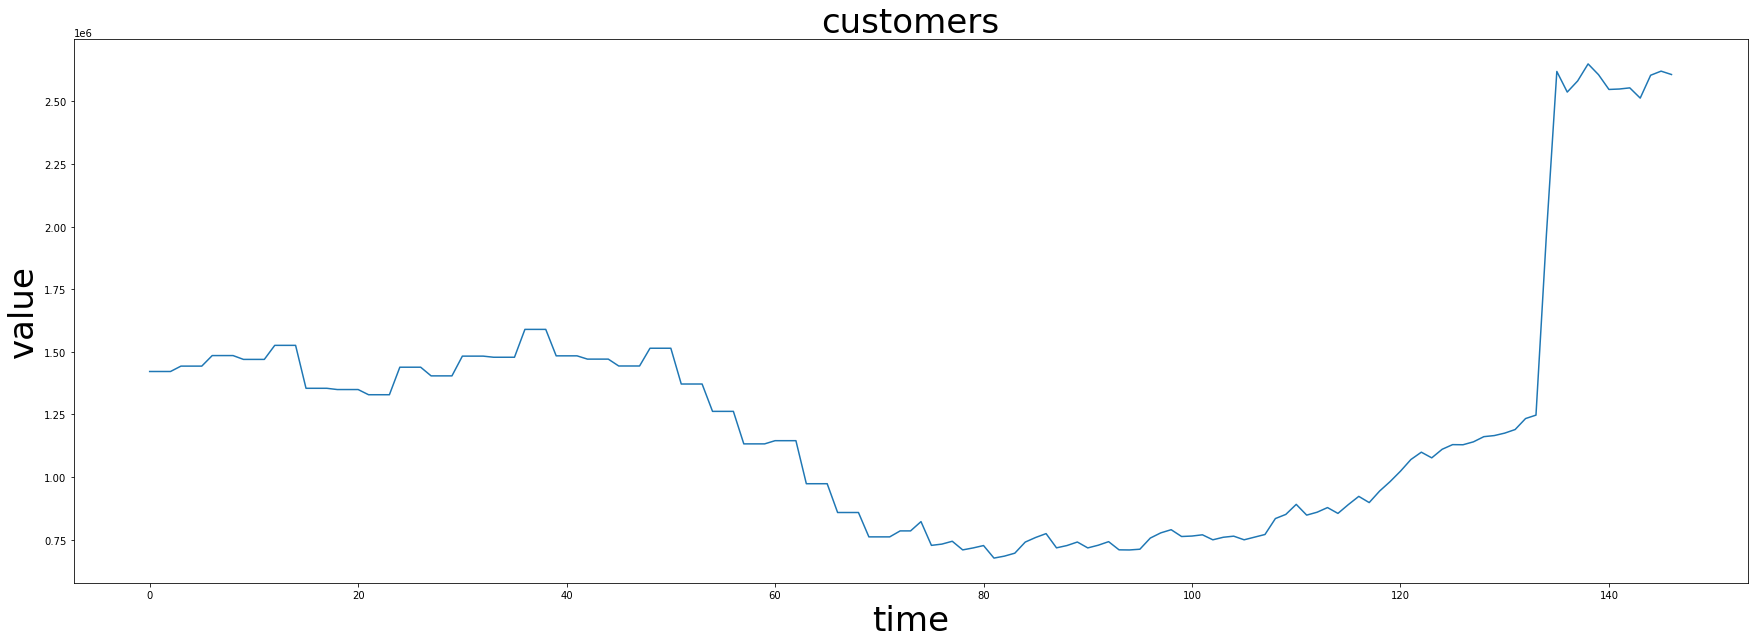

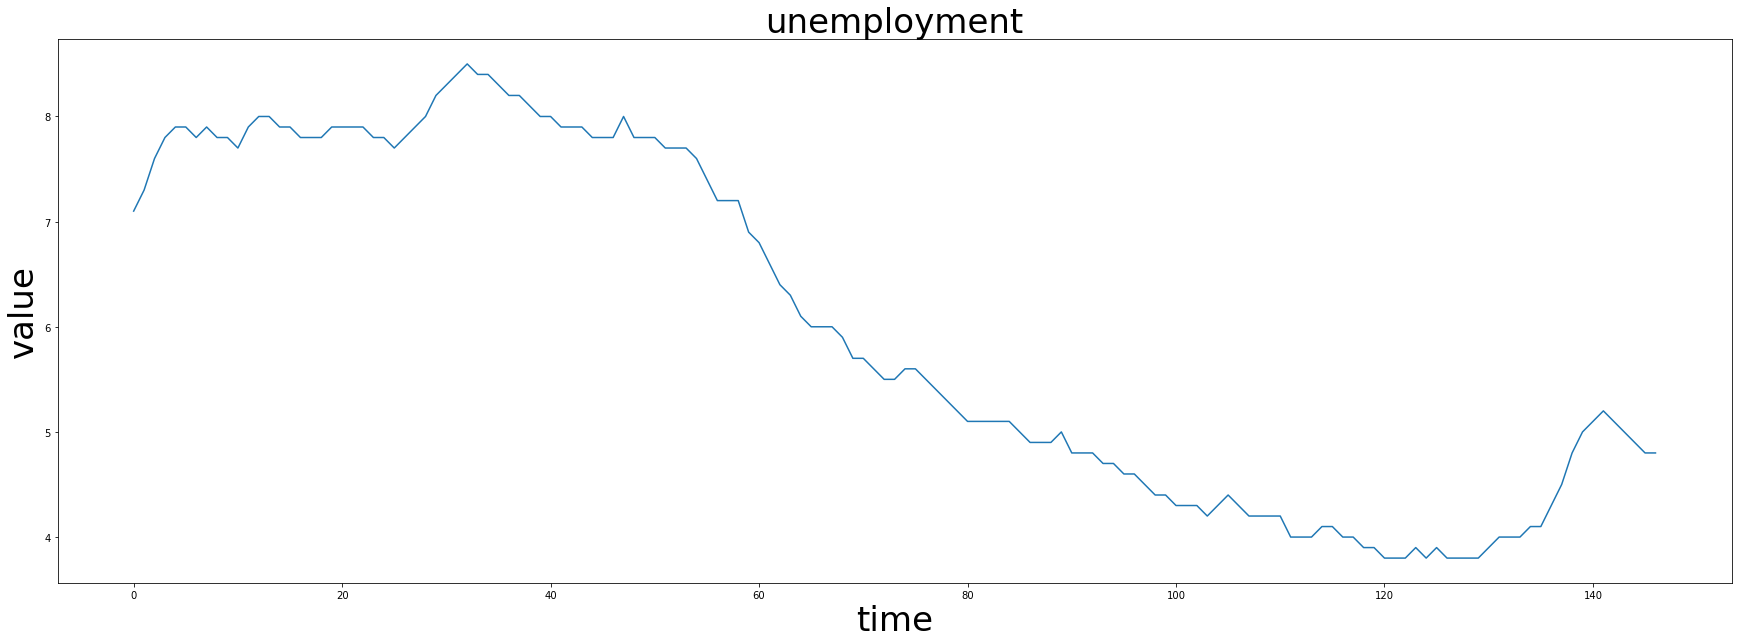

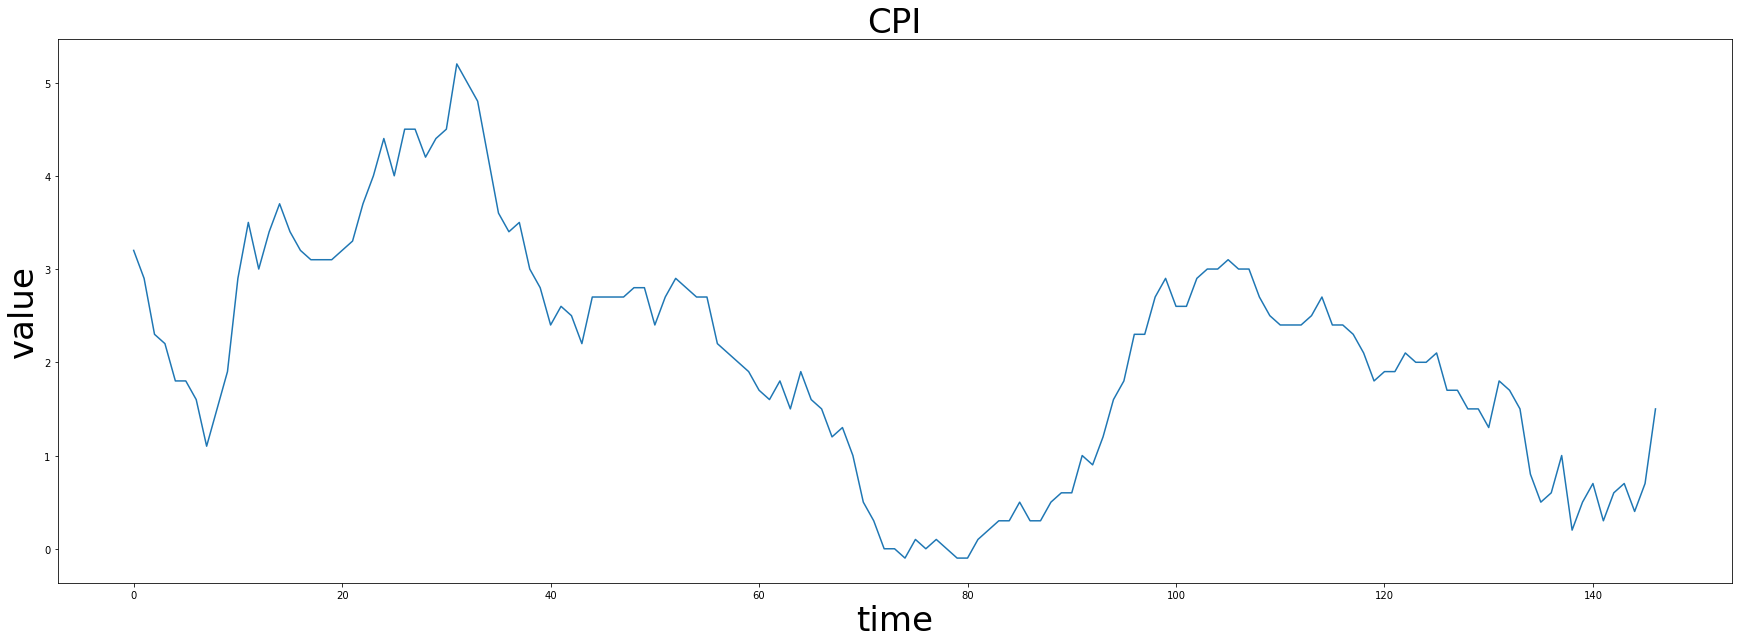

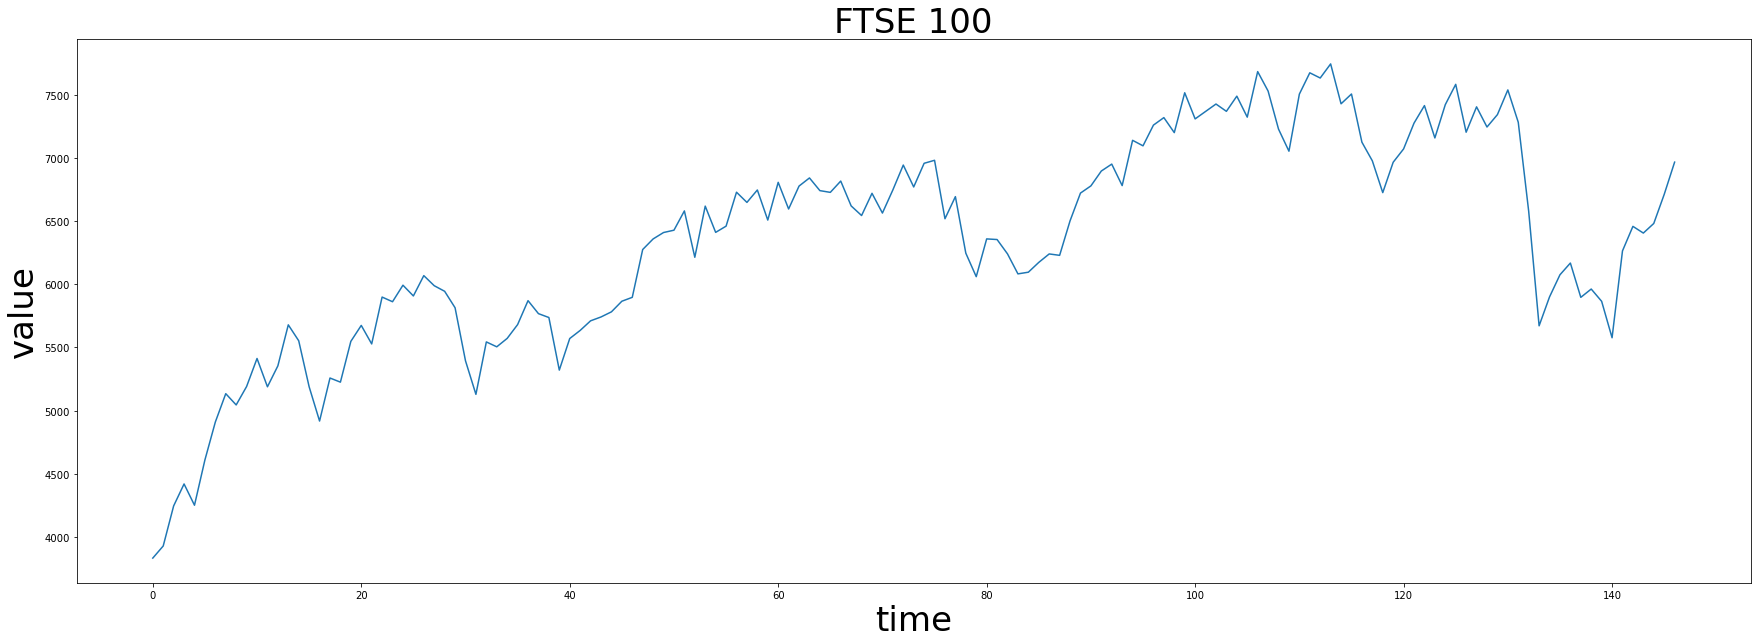

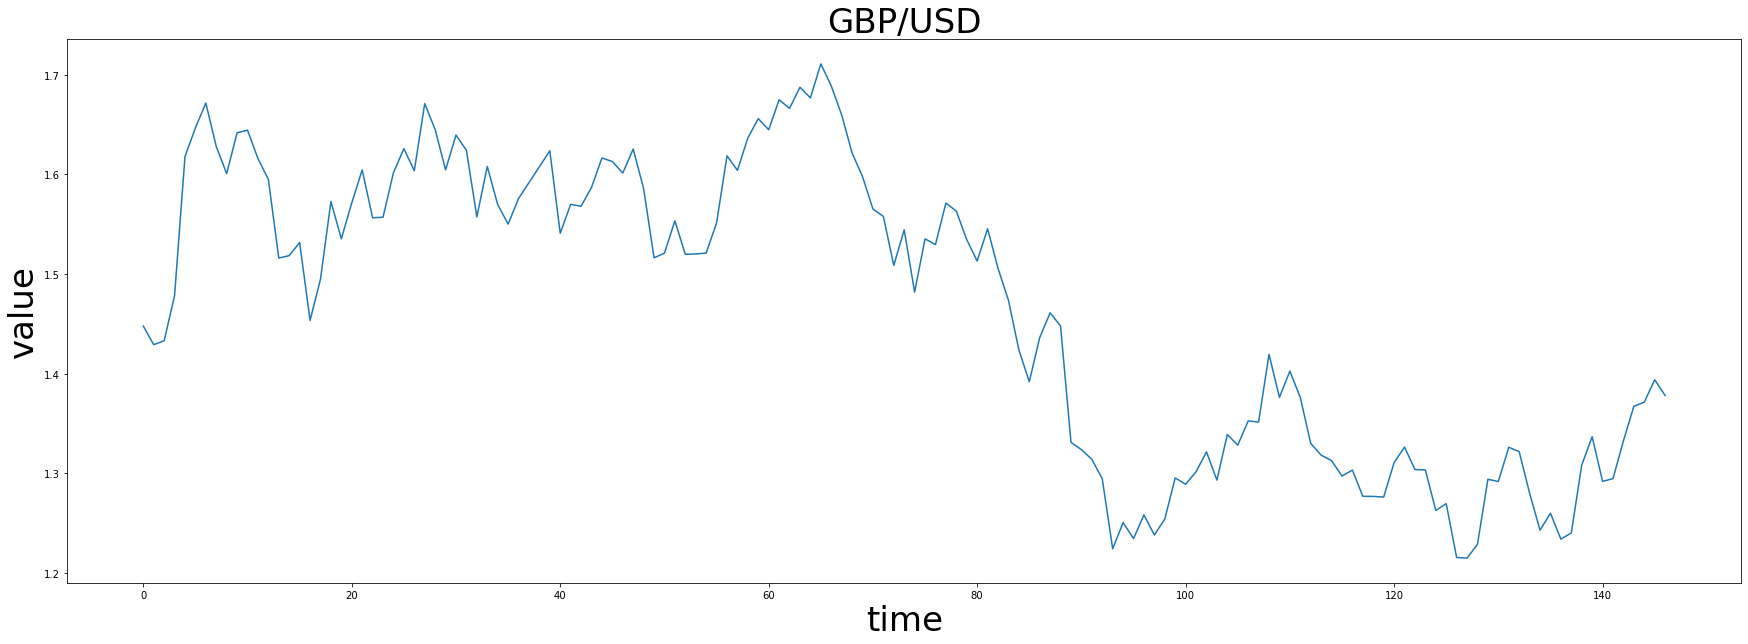

In [89]:
for ind, column in enumerate(uc_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        uc_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [90]:
uc_data[["date"]] = uc_data[["date"]].apply(pd.to_datetime)
uc_data = uc_data.set_index('date')
uc_data = uc_data.sort_index()

In [111]:
training_data = uc_data[:132]
training_data.shape

(132, 5)

In [112]:
testing_data = uc_data[132:]
testing_data.shape

(15, 5)

In [113]:
training_data

,customers,unemployment,CPI,FTSE 100,GBP/USD
date,,,,,
2009-02-01,1421543,7.1,3.2,3830.09,1.4477
2009-03-01,1421543,7.3,2.9,3926.14,1.4290
2009-04-01,1421543,7.6,2.3,4243.71,1.4329
2009-05-01,1443002,7.8,2.2,4417.94,1.4781
2009-06-01,1443002,7.9,1.8,4249.21,1.6178
...,...,...,...,...,...
2019-09-01,1140885,3.8,1.7,7408.21,1.2149
2019-10-01,1161558,3.8,1.5,7248.38,1.2287
2019-11-01,1165886,3.8,1.5,7346.53,1.2940


In [114]:
testing_data

,customers,unemployment,CPI,FTSE 100,GBP/USD
date,,,,,
2020-02-01,1233818,4.0,1.7,6580.61,1.3217
2020-03-01,1247457,4.0,1.5,5671.96,1.2800
2020-04-01,1967111,4.1,0.8,5901.21,1.2429
2020-05-01,2618677,4.1,0.5,6076.60,1.2599
2020-06-01,2536454,4.3,0.6,6169.74,1.2339
2020-07-01,2580907,4.5,1.0,5897.76,1.2401
2020-08-01,2648793,4.8,0.2,5963.57,1.3082
2020-09-01,2605821,5.0,0.5,5866.10,1.3367
2020-10-01,2546850,5.1,0.7,5577.27,1.2919


In [115]:
print(training_data.shape, testing_data.shape)

(132, 5) (15, 5)


In [116]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [117]:
y_train = training_data['customers'].to_numpy(copy=True, dtype=str)
y_test = testing_data['customers'].to_numpy(copy=True, dtype=str)

In [118]:
ploting_data = pd.DataFrame(testing_data['customers'])

In [119]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [120]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132, 5) (15, 5) (132,) (15,)


In [121]:
reg = RandomForestRegressor()

In [122]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
preds = reg.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, preds)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [125]:
y_test

array(['1233818', '1247457', '1967111', '2618677', '2536454', '2580907',
       '2648793', '2605821', '2546850', '2548611', '2553201', '2512381',
       '2603555', '2619909', '2606474'], dtype='<U21')

In [126]:
preds

array([1207324.59, 1217853.26, 1539578.54, 1538888.78, 1538888.78,
       1539578.54, 1539348.62, 1539578.54, 1539056.24, 1538888.78,
       1535387.2 , 1538888.78, 1535387.2 , 1522972.32, 1522831.1 ])

In [127]:
mse

888993316927.6133

In [128]:
testing_data['predictions'] = preds

<ipython-input-128-1a0b12eca62c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['predictions'] = preds


In [129]:
y_test

array(['1233818', '1247457', '1967111', '2618677', '2536454', '2580907',
       '2648793', '2605821', '2546850', '2548611', '2553201', '2512381',
       '2603555', '2619909', '2606474'], dtype='<U21')

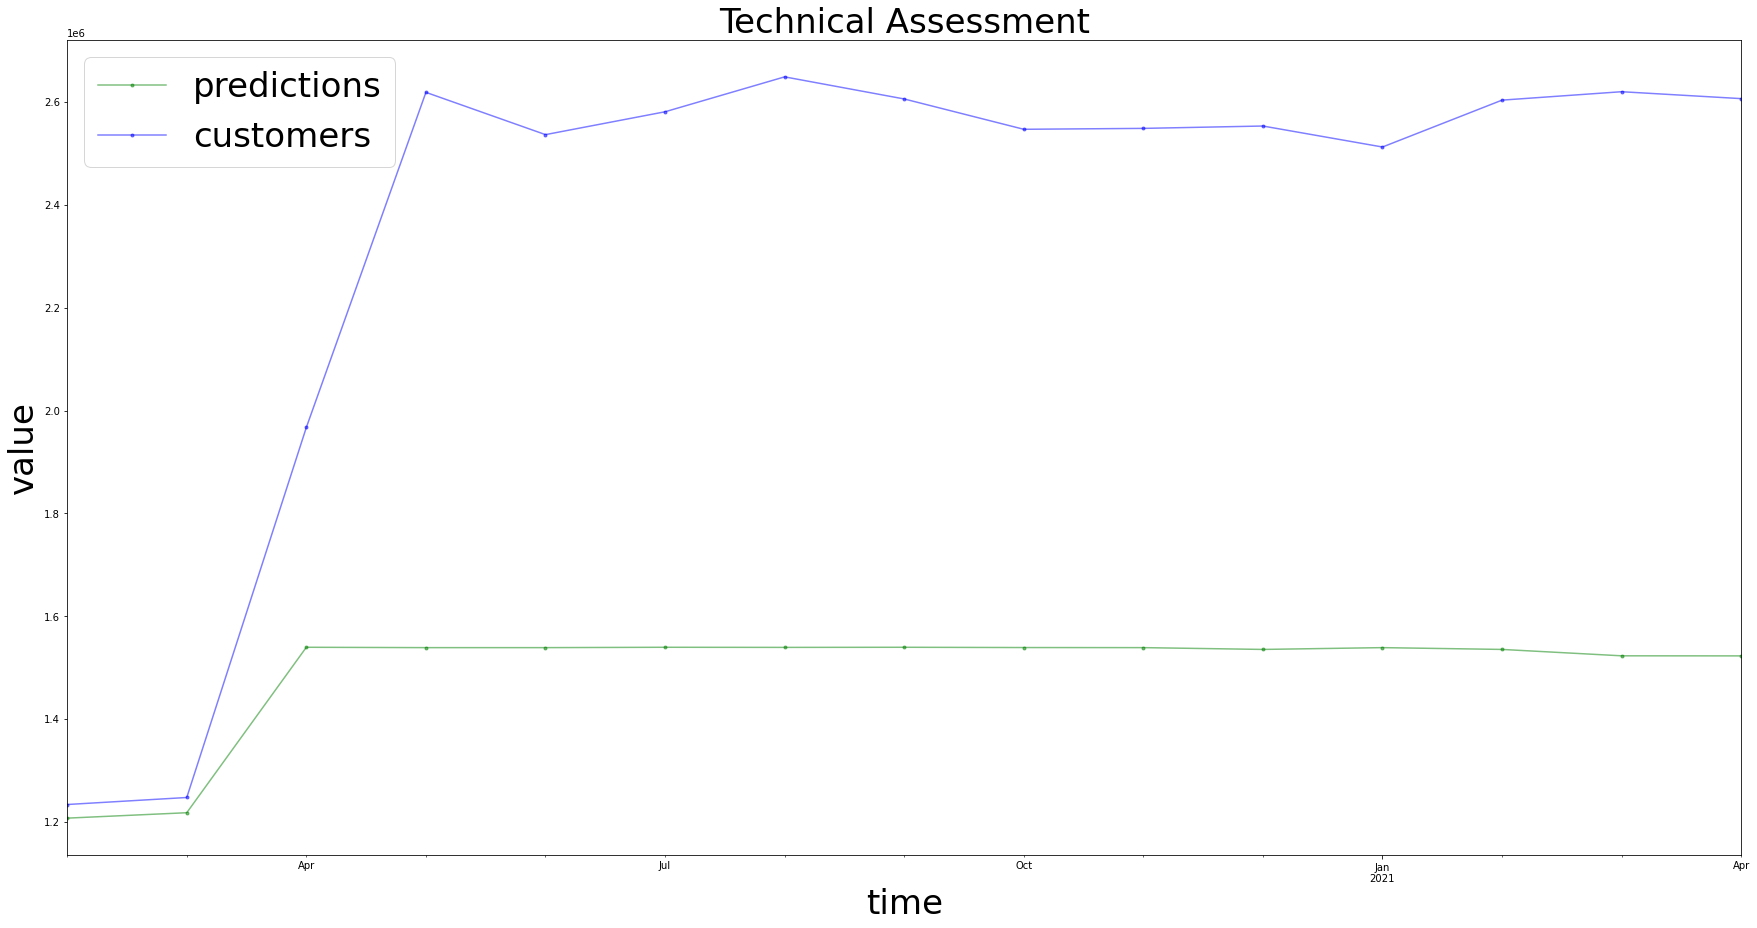

In [130]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['customers'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('time',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)